<a href="https://colab.research.google.com/github/Davi-Esmeraldo/TCC/blob/main/TCC_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python 3.10

In [ ]:
# 1. Webscraping

import requests  # Biblioteca para realizar requisições HTTP e acessar páginas da web
from bs4 import BeautifulSoup  # Ferramenta para extrair dados de HTML e XML de forma estruturada
import time  # Utilizado para criar pausas entre as requisições, evitando sobrecarga no servidor
import re  # Biblioteca para trabalhar com expressões regulares e buscar padrões de texto


In [ ]:
# 1. Webscraping

# Função para extrair o conteúdo de uma portaria
def extrair_conteudo(link):
    try:
        response = requests.get(link)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            texto_completo = soup.get_text(separator='\n', strip=True)

            # Padrão de regex flexível para capturar o conteúdo da portaria
            padrao = (
                r"Poder Judiciário da União\s*(.*?)\s*ESTE TEXTO NÃO SUBSTITUI"
            )
            match = re.search(padrao, texto_completo, re.DOTALL | re.IGNORECASE)
            return match.group(1).strip() if match else "Conteúdo não encontrado."
        else:
            print(f"Erro ao acessar {link}: {response.status_code}")
            return "Erro ao acessar o conteúdo."
    except Exception as e:
        print(f"Erro ao acessar {link}: {e}")
        return "Erro ao acessar o conteúdo."

In [ ]:
# 1. Webscraping

# Função para buscar e extrair links de uma página
def extrair_links(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        portarias = {}
        for link in soup.find_all('a', href=True):
            href = link.get('href')
            texto = link.get_text(strip=True)
            if 'portaria' in texto.lower() or 'pdf' in href.lower():
                numero = re.findall(r'\d+', texto)
                if numero:
                    numero_portaria = numero[0]
                    link_completo = (
                        href if href.startswith('http')
                        else f"https://www.tjdft.jus.br{href}"
                    )
                    conteudo = extrair_conteudo(link_completo)

                    # Extração de data
                    padrao_data = r'\d{2}/\d{2}/\d{4}'
                    match = re.search(padrao_data, texto)
                    data = match.group() if match else None

                    portarias[numero_portaria] = {'data': data, 'conteudo': conteudo}
        return portarias
    else:
        print(f"Erro ao acessar {url}: {response.status_code}")
        return {}

In [ ]:
# 1. Webscraping

# Função principal que percorre as páginas até o limite definido
def scraping_paginacao(base_url, inicio=0, limite=1680, delay=1):
    todas_portarias = {}
    pagina_atual = inicio

    while pagina_atual <= limite:
        url_pag = f"{base_url}?b_start:int={pagina_atual}"
        print(f"Acessando: {url_pag}")
        todas_portarias.update(extrair_links(url_pag))
        time.sleep(delay)
        pagina_atual += 30  # Incrementa para a próxima página

    print("Scraping finalizado.")
    return todas_portarias

In [ ]:
# 1. Webscraping

# URL base
base_url = "https://www.tjdft.jus.br/publicacoes/publicacoes-oficiais/portarias-gpr/2024"

# Executa o scraping e armazena todas as portarias até o limite definido
todas_portarias = scraping_paginacao(base_url, inicio=0, limite=1680, delay=0.5)

print(todas_portarias)

Acessando: https://www.tjdft.jus.br/publicacoes/publicacoes-oficiais/portarias-gpr/2024?b_start:int=0
Acessando: https://www.tjdft.jus.br/publicacoes/publicacoes-oficiais/portarias-gpr/2024?b_start:int=30
Acessando: https://www.tjdft.jus.br/publicacoes/publicacoes-oficiais/portarias-gpr/2024?b_start:int=60
Acessando: https://www.tjdft.jus.br/publicacoes/publicacoes-oficiais/portarias-gpr/2024?b_start:int=90
Acessando: https://www.tjdft.jus.br/publicacoes/publicacoes-oficiais/portarias-gpr/2024?b_start:int=120
Acessando: https://www.tjdft.jus.br/publicacoes/publicacoes-oficiais/portarias-gpr/2024?b_start:int=150
Acessando: https://www.tjdft.jus.br/publicacoes/publicacoes-oficiais/portarias-gpr/2024?b_start:int=180
Acessando: https://www.tjdft.jus.br/publicacoes/publicacoes-oficiais/portarias-gpr/2024?b_start:int=210
Acessando: https://www.tjdft.jus.br/publicacoes/publicacoes-oficiais/portarias-gpr/2024?b_start:int=240
Acessando: https://www.tjdft.jus.br/publicacoes/publicacoes-oficiais/

In [ ]:
# 2. Tratamento

# Limpar o conteúdo da portaria

for numero, dados in todas_portarias.items():
    conteudo = dados['conteudo']
    indice = conteudo.find("2024\n")  # Procurar "2024\n"

    if indice != -1:  # Se encontrado
        dados['conteudo'] = conteudo[indice + len("2024\n"):].strip()
    else:
        dados['conteudo'] = conteudo  # Caso não encontre, mantém o original

# Exibir resultado atualizado
print(todas_portarias)



{'1963': {'data': '30/12/2024', 'conteudo': 'O PRESIDENTE DO TRIBUNAL DE JUSTIÇA DO DISTRITO FEDERAL E DOS TERRITÓRIOS, no uso de suas atribuições legais, nos termos do art. 262-A, § 3º, do\nProvimento-Geral da Corregedoria aplicado aos Serviços Notariais e de Registro\n, e em vista do contido no processo SEI 0039527/2024,\nRESOLVE:\nArt. 1º Exonerar, a pedido, Claudia Cruz Cerquinho de Oliveira do cargo de juíza de paz 1ª suplente do 3º Ofício de Registro Civil, Títulos e Documentos e Pessoas Jurídicas do Paranoá, a partir de 22 de dezembro de 2024.\nArt. 2º Declarar vago o cargo de juiz de paz 1º suplente do 3º Ofício de Registro Civil, Títulos e Documentos e Pessoas Jurídicas do Paranoá, a ser preenchido mediante remoção entre os juízes de paz suplentes em exercício no Distrito Federal Parágrafo único. Os interessados deverão requerer inscrição no prazo de 10 dias a contar da publicação desta Portaria.\nArt. 3º Esta Portaria entra em vigor na data de sua publicação.\nDesembargador W

In [ ]:
# 2. Tratamento
# Salvar Dados

from google.colab import drive
import json

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para salvar dentro do Drive
caminho_arquivo = "/content/drive/My Drive/UnB/EU/TCC/Davi/Dados/todas_portarias.json"

# Salvando os dados
with open(caminho_arquivo, "w", encoding="utf-8") as f:
    json.dump(todas_portarias, f, ensure_ascii=False, indent=4)

print(f"Dados salvos em {caminho_arquivo}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dados salvos em /content/drive/My Drive/UnB/EU/TCC/Davi/Dados/todas_portarias.json


In [14]:
# 2. Tratamento
# Carregar Dados


from google.colab import drive
import json

# Montar o Google Drive
drive.mount('/content/drive')

import os

caminho_arquivo = "/content/drive/My Drive/UnB/EU/TCC/Davi/Dados/todas_portarias.json"

# Verifica se o arquivo já existe no Drive
if os.path.exists(caminho_arquivo):
    with open(caminho_arquivo, "r", encoding="utf-8") as f:
        todas_portarias = json.load(f)
    print("Dados carregados do Google Drive.")
else:
    print("Arquivo não encontrado. Execute o scraping.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dados carregados do Google Drive.


In [15]:
# 2. Tratamento NLP

import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Baixar stopwords se necessário
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Definir stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Lista de palavras e caracteres indesejados
palavras_remover = {"ª", "º", "°", "§§", "§º", "§" , "art", "caput", "cc", "deste", "desta", "desse", "dessa", "nª", "nº", "n°"}

# Expressão regular para remover números romanos (I, II, III, IV, V...)
numeros_romanos_pattern = r'\b(?:i|ii|iii|iv|v|vi|vii|viii|ix|x|xi|xii|xiii|xiv|xv|xvi|xvii|xviii|xix|xx)\b'

# Criar um novo dicionário para armazenar os dados processados
portarias_processadas = {}

for numero, dados in todas_portarias.items():
    conteudo = dados['conteudo'].lower()  # Converter para minúsculas
    conteudo = re.sub(r'\d+', '', conteudo)  # Remover números
    conteudo = re.sub(numeros_romanos_pattern, '', conteudo)  # Remover números romanos
    conteudo = conteudo.translate(str.maketrans('', '', string.punctuation))  # Remover pontuação
    conteudo = conteudo.replace("\n", " ")  # Remover quebras de linha

    # Tokenizar palavras
    tokens = word_tokenize(conteudo)

    # Remover stopwords e palavras indesejadas
    tokens_filtrados = [word for word in tokens if word not in stop_words and word not in palavras_remover]

    # Criar novo dicionário mantendo a estrutura original
    portarias_processadas[numero] = {
        'data': dados['data'],
        'conteudo': " ".join(tokens_filtrados)  # Rejuntar palavras tratadas em um texto
    }

# Exibir resultado atualizado
print(portarias_processadas)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'1963': {'data': '30/12/2024', 'conteudo': 'presidente tribunal justiça distrito federal territórios uso atribuições legais termos provimentogeral corregedoria aplicado serviços notariais registro vista contido processo sei resolve exonerar pedido claudia cruz cerquinho oliveira cargo juíza paz suplente ofício registro civil títulos documentos pessoas jurídicas paranoá partir dezembro declarar vago cargo juiz paz suplente ofício registro civil títulos documentos pessoas jurídicas paranoá preenchido mediante remoção juízes paz suplentes exercício distrito federal parágrafo único interessados deverão requerer inscrição prazo dias contar publicação portaria portaria entra vigor data publicação desembargador waldir leôncio júnior presidente'}, '1962': {'data': '30/12/2024', 'conteudo': 'dispõe sobre prova vida magistrados servidores aposentados beneficiários pensão civil tribunal justiça distrito federal territórios presidente tribunal justiça distrito federal territórios uso atribuições 

In [16]:
# 2. Tratamento NLP
# Salvar Dados

from google.colab import drive
import json

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para salvar dentro do Drive
caminho_arquivo = "/content/drive/My Drive/UnB/EU/TCC/Davi/Dados/portarias_processadas.json"

# Salvando os dados
with open(caminho_arquivo, "w", encoding="utf-8") as f:
    json.dump(portarias_processadas, f, ensure_ascii=False, indent=4)

print(f"Dados salvos em {caminho_arquivo}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dados salvos em /content/drive/My Drive/UnB/EU/TCC/Davi/Dados/portarias_processadas.json


In [17]:
# 2. Tratamento NLP
# Carregar Dados

import os

caminho_arquivo = "/content/drive/My Drive/UnB/EU/TCC/Davi/Dados/portarias_processadas.json"

# Verifica se o arquivo já existe no Drive
if os.path.exists(caminho_arquivo):
    with open(caminho_arquivo, "r", encoding="utf-8") as f:
        portarias_processadas = json.load(f)
    print("Dados carregados do Google Drive.")
else:
    print("Arquivo não encontrado. Execute o scraping.")


Dados carregados do Google Drive.


In [18]:
# 3. Exploratória

# Gerar lista completa de portarias esperadas
portarias_esperadas = set(map(str, range(1, 1964)))  # De '1' a '1963'

# Obter portarias presentes no dicionário
portarias_presentes = set(portarias_processadas.keys())

# Identificar portarias ausentes
portarias_faltando = sorted(portarias_esperadas - portarias_presentes)

# Exibir resultado
print(f"Total de portarias esperadas: {len(portarias_esperadas)}")
print(f"Total de portarias presentes: {len(portarias_presentes)}")
print(f"Total de portarias ausentes: {len(portarias_faltando)}")
print("Portarias ausentes:", portarias_faltando)

# Obs: De fato essas portarias não existem no Site do TJDFT

Total de portarias esperadas: 1963
Total de portarias presentes: 1704
Total de portarias ausentes: 259
Portarias ausentes: ['1003', '1015', '1024', '1025', '1031', '1037', '1038', '1050', '1051', '1059', '108', '1104', '1107', '1111', '1119', '1133', '1134', '1136', '1148', '1159', '1161', '1169', '1172', '1173', '1175', '1176', '1183', '1199', '1201', '1210', '1211', '1216', '1253', '1254', '1255', '1256', '1257', '1258', '1259', '1260', '1261', '1270', '1271', '1272', '1273', '1274', '1275', '1276', '1278', '1279', '1280', '1281', '1282', '1283', '1285', '1286', '1287', '1288', '1290', '1291', '1292', '1293', '1294', '1295', '1297', '1301', '1312', '1313', '1318', '1319', '1335', '1336', '1337', '1338', '1339', '1340', '1341', '1342', '1343', '1344', '1345', '1346', '1347', '1348', '1349', '1350', '1351', '1352', '1353', '1354', '1355', '1356', '1357', '1358', '1359', '1360', '1361', '1362', '1363', '1364', '1365', '1368', '1370', '1371', '1372', '1373', '1374', '1377', '1389', '1390

<ipython-input-19-8420a56f7c77>:16: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data'] = pd.to_datetime(df['data'], errors='coerce')


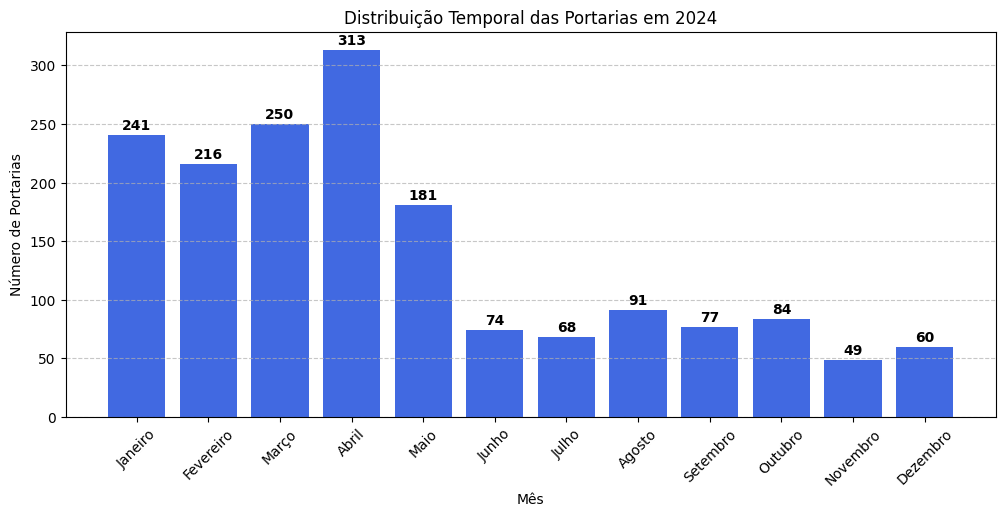

In [19]:
# 3. Exploratória

import pandas as pd
import matplotlib.pyplot as plt

# Dicionário de meses em português
meses_em_portugues = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
    7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

# Criar DataFrame
df = pd.DataFrame.from_dict(portarias_processadas, orient='index')

# Converter datas para formato datetime
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Remover portarias sem data
df = df.dropna(subset=['data'])

# Obter contagem de portarias por mês
contagem_mensal = df['data'].dt.to_period('M').value_counts().sort_index()

# Converter para formato mês com o mapeamento para português
contagem_mensal.index = contagem_mensal.index.month.map(meses_em_portugues)

# Criar gráfico de barras
plt.figure(figsize=(12, 5))
barras = plt.bar(contagem_mensal.index, contagem_mensal.values, color='royalblue')

# Adicionar rótulos no topo das barras
for barra in barras:
    plt.text(barra.get_x() + barra.get_width()/2,
             barra.get_height() + 2,  # Ajuste da posição do texto
             str(barra.get_height()),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Ajustes do gráfico
plt.xlabel("Mês")
plt.ylabel("Número de Portarias")
plt.title("Distribuição Temporal das Portarias em 2024")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona linhas de grade horizontais para melhor visualização

# Exibir gráfico
plt.show()


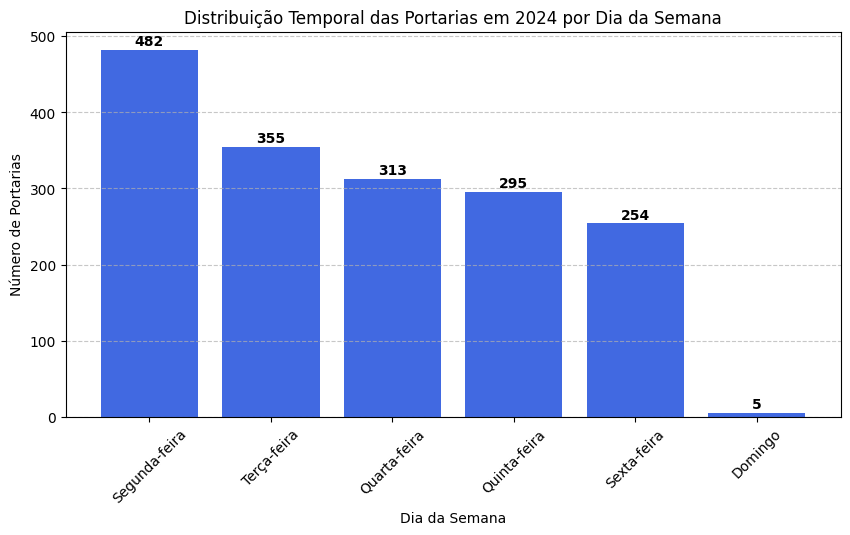

In [20]:
# 3. Exploratória

# Dicionário de dias da semana em português
dias_semana_portugues = {
    0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira',
    3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'
}

contagem_dia_semana = df['data'].dt.dayofweek.value_counts().sort_index()
contagem_dia_semana.index = contagem_dia_semana.index.map(dias_semana_portugues)

plt.figure(figsize=(10, 5))
barras = plt.bar(contagem_dia_semana.index, contagem_dia_semana.values, color='royalblue')

# Adicionar rótulos no topo das barras
for barra in barras:
    plt.text(barra.get_x() + barra.get_width()/2,
             barra.get_height() + 2,
             str(barra.get_height()),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Dia da Semana")
plt.ylabel("Número de Portarias")
plt.title("Distribuição Temporal das Portarias em 2024 por Dia da Semana")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
# 3. Exploratória

# Filtrar portarias publicadas no domingo (dia 6 no Pandas)
portarias_domingo = df[df['data'].dt.dayofweek == 6]

# Exibir os números das portarias publicadas no domingo
print("Portarias publicadas no domingo:")
print(portarias_domingo.index.tolist())


Portarias publicadas no domingo:
['1955', '1896', '1724', '1723', '1686']



Palavras mais frequentes nas portarias:
tribunal: 5492
matrícula: 3775
presidente: 3515
pessoal: 3104
fc: 3081
judiciário: 3043
quadro: 3006
área: 2957
federal: 2790
portaria: 2780
justiça: 2630
distrito: 2506
n: 2488
desembargador: 2445
função: 2298
comissionada: 2250
territórios: 2172
administrativa: 2016
técnico: 2008
resolve: 1702


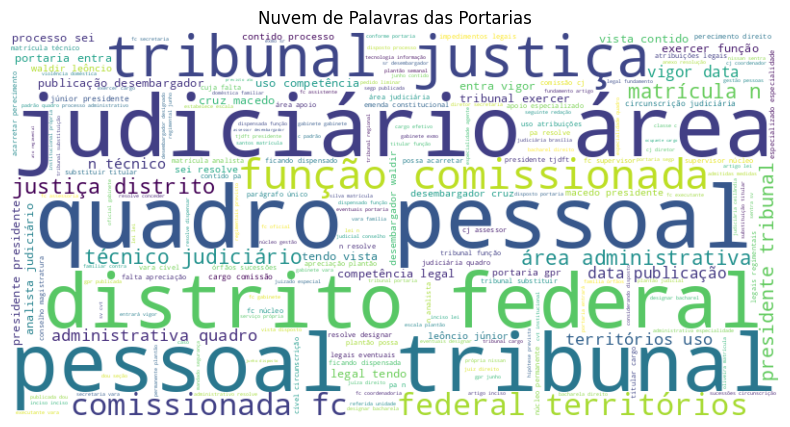

In [35]:
# 3. Exploratória

import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import re

# Extrair textos das portarias
textos = [item['conteudo'] for item in portarias_processadas.values() if 'conteudo' in item]

# Unir todos os textos em uma única string
texto_unico = " ".join(textos)

# Tokenizar palavras
palavras = texto_unico.split()
# palavras = texto_limpo.split()

# Contar palavras mais comuns
frequencia_palavras = Counter(palavras).most_common(20)
print("\nPalavras mais frequentes nas portarias:")
for palavra, freq in frequencia_palavras:
    print(f"{palavra}: {freq}")

# Gerar nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(palavras))

# Exibir nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras das Portarias")
plt.show()


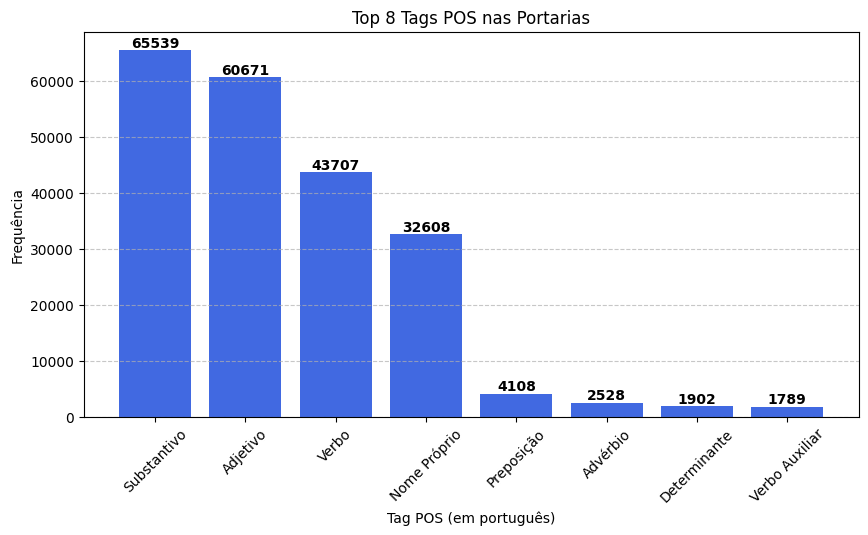

In [39]:
#3 Exploratoria Lematização Tags POS

import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Carregar o modelo do spaCy para português
nlp = spacy.load("pt_core_news_sm")

# Dicionário de tradução das tags POS para português
pos_mapping = {
    "ADJ": "Adjetivo",
    "ADP": "Preposição",
    "ADV": "Advérbio",
    "AUX": "Verbo Auxiliar",
    "CCONJ": "Conjunção Coordenativa",
    "DET": "Determinante",
    "INTJ": "Interjeição",
    "NOUN": "Substantivo",
    "NUM": "Número",
    "PART": "Partícula",
    "PRON": "Pronome",
    "PROPN": "Nome Próprio",
    "PUNCT": "Pontuação",
    "SCONJ": "Conjunção Subordinativa",
    "SYM": "Símbolo",
    "VERB": "Verbo",
    "X": "Outros"
}

# Função para aplicar POS Tagging e lematizar as palavras
def pos_tagging_lematizado(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc]
    pos_tags = [token.pos_ for token in doc]
    return lemas, pos_tags

# Criando o novo dicionário com lematização e POS tagging
portarias_lematizadas_postag = {}

# Contador para as tags POS
contagem_tags_pos = Counter()

# Aplicando o processamento para cada portaria
for key, portaria in portarias_processadas.items():
    conteudo = portaria['conteudo']
    lemas, pos_tags = pos_tagging_lematizado(conteudo)
    contagem_tags_pos.update(pos_tags)

    # Criando a estrutura da nova portaria processada
    portarias_lematizadas_postag[key] = {
        'data': portaria['data'],
        'conteudo_lematizado': " ".join(lemas),
        'pos_tags': pos_tags
    }

# Traduzir as tags POS para português
tags_pos_pt = {tag: pos_mapping.get(tag, tag) for tag in contagem_tags_pos.keys()}

# Ordenar as tags POS por quantidade em ordem decrescente
tags_ordenadas = sorted(contagem_tags_pos.items(), key=lambda x: x[1], reverse=True)

# Selecionar as 8 tags POS mais significativas
tags_mais_significativas = tags_ordenadas[:8]

# Separar as tags e suas contagens para o gráfico
tags = [tags_pos_pt[tag[0]] for tag in tags_mais_significativas]
quantidade = [tag[1] for tag in tags_mais_significativas]

# Plotando o gráfico no estilo solicitado
plt.figure(figsize=(10, 5))
barras = plt.bar(tags, quantidade, color='royalblue')

# Adicionar rótulos no topo das barras
for barra in barras:
    plt.text(barra.get_x() + barra.get_width()/2,
             barra.get_height() + 2,
             str(barra.get_height()),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Tag POS (em português)")
plt.ylabel("Frequência")
plt.title("Top 8 Tags POS nas Portarias")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [40]:
# Salvar Dados

from google.colab import drive
import json

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para salvar dentro do Drive
caminho_arquivo = "/content/drive/My Drive/UnB/EU/TCC/Davi/Dados/portarias_lematizadas_postag.json"

# Salvando os dados
with open(caminho_arquivo, "w", encoding="utf-8") as f:
    json.dump(portarias_lematizadas_postag, f, ensure_ascii=False, indent=4)

print(f"Dados salvos em {caminho_arquivo}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dados salvos em /content/drive/My Drive/UnB/EU/TCC/Davi/Dados/portarias_lematizadas_postag.json


In [ ]:
# Carregar Dados
from google.colab import drive
import json

# Montar o Google Drive
drive.mount('/content/drive')

import os

caminho_arquivo = "/content/drive/My Drive/UnB/EU/TCC/Davi/Dados/portarias_lematizadas_postag.json"

# Verifica se o arquivo já existe no Drive
if os.path.exists(caminho_arquivo):
    with open(caminho_arquivo, "r", encoding="utf-8") as f:
        portarias_lematizadas_postag = json.load(f)
    print("Dados carregados do Google Drive.")
else:
    print("Arquivo não encontrado. Execute o scraping.")

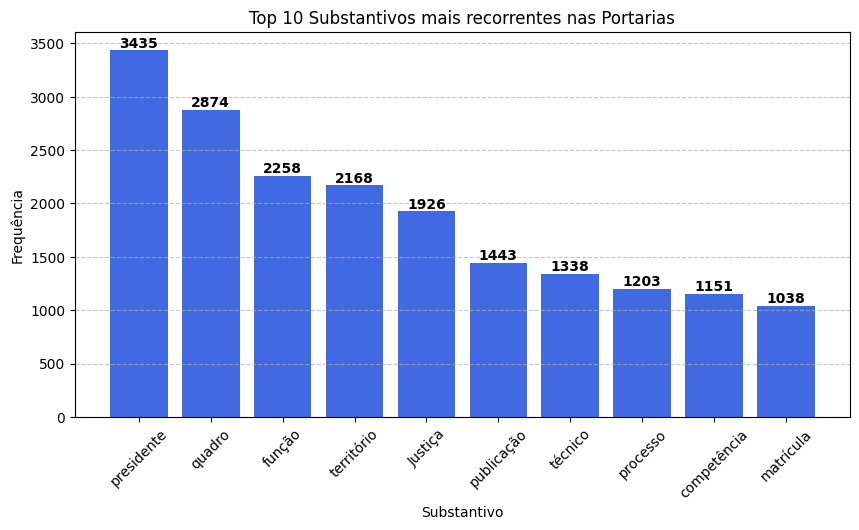

In [46]:
# 3. Exploratóriaimport matplotlib.pyplot as plt
from collections import Counter

# Contadores para as palavras lematizadas já classificadas por POS
contagem_substantivos = Counter()
contagem_verbos = Counter()

# Processar cada portaria e contar as palavras conforme a POS tag
for key, portaria in portarias_lematizadas_postag.items():
    palavras = portaria['conteudo_lematizado'].split()
    pos_tags = portaria['pos_tags']

    for palavra, pos in zip(palavras, pos_tags):
        if pos == 'NOUN':
            contagem_substantivos[palavra] += 1
        elif pos == 'VERB':
            contagem_verbos[palavra] += 1

# Selecionar as 10 palavras mais comuns em cada categoria
top_substantivos = contagem_substantivos.most_common(10)
top_verbos = contagem_verbos.most_common(10)

# Função para plotar gráficos de barras das palavras mais comuns
def plotar_top_palavras(top_palavras, categoria):
    if not top_palavras:  # Caso não haja palavras na categoria
        print(f"Nenhuma palavra encontrada para {categoria}.")
        return

    palavras, frequencias = zip(*top_palavras)
    plt.figure(figsize=(10, 5))
    barras = plt.bar(palavras, frequencias, color='royalblue')

    # Adicionar rótulos no topo das barras
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width()/2,
                 barra.get_height() + 1,
                 str(barra.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.xlabel(categoria)
    plt.ylabel('Frequência')
    plt.title(f'Top 10 {categoria}s mais recorrentes nas Portarias')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plotando para cada categoria
plotar_top_palavras(top_substantivos, 'Substantivo')


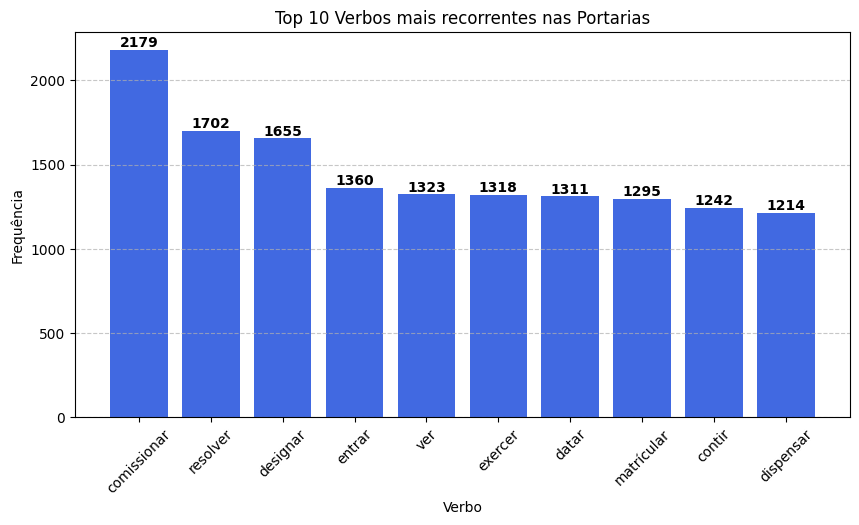

In [47]:
plotar_top_palavras(top_verbos, 'Verbo')



Palavras mais frequentes nas portarias (lematizadas):
tribunal: 5502
presidente: 3517
pessoal: 3158
fc: 3081
judiciário: 3066
quadro: 3010
área: 2971
federal: 2802
desembargador: 2674
distrito: 2506
Justiça: 2498
n: 2488
matrícular: 2436
função: 2420
administrativo: 2392
comissionar: 2336
técnico: 2178
território: 2176
legal: 2118
portaria: 1780


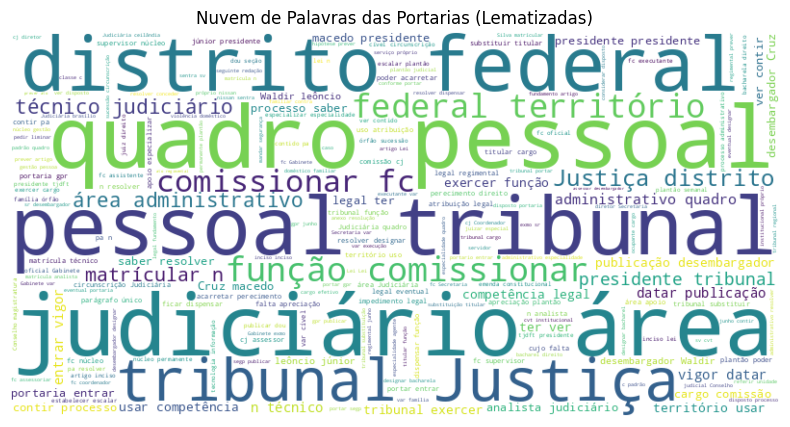

In [45]:
# Exploratoria

import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Extrair textos já lematizados das portarias
textos_lemmatizados = [item['conteudo_lematizado'] for item in portarias_lematizadas_postag.values() if 'conteudo_lematizado' in item]

# Unir todos os textos em uma única string
texto_unico = " ".join(textos_lemmatizados)

# Tokenizar palavras
palavras = texto_unico.split()

# Contar palavras mais comuns
frequencia_palavras = Counter(palavras).most_common(20)
print("\nPalavras mais frequentes nas portarias (lematizadas):")
for palavra, freq in frequencia_palavras:
    print(f"{palavra}: {freq}")

# Gerar nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_unico)

# Exibir nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras das Portarias (Lematizadas)")
plt.show()


In [25]:
!python -m spacy download pt_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 55.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# 4. Vetorização Númerica

# TextRank # Identifica palavras mais relevantes sem depender diretamente da frequência absoluta
#(Inspirado no PageRank, que é utilizado pelo Google para ranquear páginas da web)

# O algoritmo TextRank é baseado em um grafo de palavras, onde:

# Nós: Cada palavra ou frase que aparece no texto.
# Arestas: A conexão entre as palavras, determinada pela proximidade ou co-ocorrência no texto.
# A ideia é que palavras mais importantes são aquelas que têm muitas conexões com outras palavras importantes, ou seja, aquelas que aparecem de maneira significativa e em várias combinações dentro do texto.

import spacy
from spacy import displacy
from spacy.tokens import Doc
from spacy import attrs
from spacy.language import Language
from spacy.matcher import PhraseMatcher

# Carregar o modelo do Spacy
nlp = spacy.load("pt_core_news_sm")

# Função para extrair palavras-chave com TextRank
def extrair_palavra_chave(texto):
    doc = nlp(texto)
    palavras_chave = [token.text for token in doc if not token.is_stop and not token.is_punct and len(token.text) > 2]

    # Gerar o ranking das palavras-chave com base em sua relevância
    palavras_chave_relevantes = [token.text for token in doc if not token.is_stop and not token.is_punct and token.rank > 0.1]

    # Retorna a palavra-chave com maior relevância para o texto
    if palavras_chave_relevantes:
        return palavras_chave_relevantes[0]
    else:
        return "Sem palavra-chave relevante"

# Dicionário para armazenar as palavras-chave mais importantes de cada portaria
portarias_palavra_chave = {}

# Iterar pelas portarias
for numero, dados in portarias_processadas.items():
    conteudo = dados['conteudo']
    palavra_chave = extrair_palavra_chave(conteudo)
    portarias_palavra_chave[numero] = palavra_chave

# Exibir as palavras-chave mais importantes para cada portaria
print("Palavras-chave das portarias:")
for numero, palavra_chave in portarias_palavra_chave.items():
    print(f"Portaria {numero}: {palavra_chave}")


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Palavras-chave das portarias:
Portaria 1963: presidente
Portaria 1962: dispõe
Portaria 1961: instaura
Portaria 1960: remove
Portaria 1959: altera
Portaria 1958: abre
Portaria 1957: abre
Portaria 1956: presidente
Portaria 1955: presidente
Portaria 1954: presidente
Portaria 1953: presidente
Portaria 1952: presidente
Portaria 1951: presidente
Portaria 1950: presidente
Portaria 1949: presidente
Portaria 1948: presidente
Portaria 1947: presidente
Portaria 1946: presidente
Portaria 1945: altera
Portaria 1944: presidente
Portaria 1943: presidente
Portaria 1942: estabelece
Portaria 1940: estabelece
Portaria 1939: estabelece
Portaria 1938: promove
Portaria 1937: acrescenta
Portaria 1936: presidente
Portaria 1935: presidente
Portaria 1934: alterada
Portaria 1933: presidente
Portaria 1932: presidente
Portaria 1931: presidente
Portaria 1930: presidente
Portaria 1929: abre
Portaria 1927: presidente
Portaria 1925: presidente
Portaria 1924: abre
Portaria 1923: presidente
Portaria 1922: presidente
Por

In [ ]:
# 4. Word Embeddings
# Word2Vec

import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import string

# Baixar os recursos necessários do NLTK
nltk.download('punkt')

# Lista de stop words em português
stop_words = set(stopwords.words('portuguese'))

# Função para tokenizar e limpar o texto
def preprocess_text(text):
    # Tokenizar o texto
    tokens = word_tokenize(text)
    # Remover palavras que são stop words ou que são apenas números
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return tokens

# Criar uma lista de todas as palavras processadas das portarias
documentos_tokenizados = []
for key, portaria in portarias_processadas.items():
    conteudo = portaria['conteudo']
    tokens = preprocess_text(conteudo)
    documentos_tokenizados.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['presidente', 'tribunal', 'justiça', 'distrito', 'federal', 'territórios', 'uso', 'atribuições', 'legais', 'termos', 'provimentogeral', 'corregedoria', 'aplicado', 'serviços', 'notariais', 'registro', 'vista', 'contido', 'processo', 'sei', 'resolve', 'exonerar', 'pedido', 'claudia', 'cruz', 'cerquinho', 'oliveira', 'cargo', 'juíza', 'paz', 'suplente', 'ofício', 'registro', 'civil', 'títulos', 'documentos', 'pessoas', 'jurídicas', 'paranoá', 'partir', 'dezembro', 'declarar', 'vago', 'cargo', 'juiz', 'paz', 'suplente', 'ofício', 'registro', 'civil', 'títulos', 'documentos', 'pessoas', 'jurídicas', 'paranoá', 'preenchido', 'mediante', 'remoção', 'juízes', 'paz', 'suplentes', 'exercício', 'distrito', 'federal', 'parágrafo', 'único', 'interessados', 'deverão', 'requerer', 'inscrição', 'prazo', 'dias', 'contar', 'publicação', 'portaria', 'portaria', 'entra', 'vigor', 'data', 'publicação', 'desembargador', 'waldir', 'leôncio', 'júnior', 'presidente']


In [ ]:
import numpy as np

# Função para calcular o vetor médio de um texto usando o modelo Word2Vec
def calcular_vetor_medio(texto, modelo):
    tokens = preprocess_text(texto)  # Pré-processar o texto (tokenização e remoção de stop words)
    vetores = []

    for palavra in tokens:
        if palavra in modelo.wv:
            vetores.append(modelo.wv[palavra])  # Adicionar o vetor da palavra

    if len(vetores) > 0:
        # Calcular o vetor médio das palavras
        vetor_medio = np.mean(vetores, axis=0)
        return vetor_medio
    else:
        return None

# Função para calcular a similaridade entre dois vetores (usando a similaridade do cosseno)
def calcular_similaridade(vetor1, vetor2):
    return np.dot(vetor1, vetor2) / (np.linalg.norm(vetor1) * np.linalg.norm(vetor2))

# Função para encontrar a palavra mais importante (com maior similaridade com o vetor médio)
def palavra_mais_importante_sem_termo_chave(texto, modelo):
    vetor_medio = calcular_vetor_medio(texto, modelo)

    if vetor_medio is None:
        return None  # Se não houver palavras para processar

    tokens = preprocess_text(texto)  # Pré-processar o texto
    maior_similaridade = -1  # Inicializar a maior similaridade
    palavra_mais_importante = ""

    for palavra in tokens:
        if palavra in modelo.wv:
            similaridade = calcular_similaridade(vetor_medio, modelo.wv[palavra])
            if similaridade > maior_similaridade:
                maior_similaridade = similaridade
                palavra_mais_importante = palavra

    return palavra_mais_importante

# Agora, aplicando a função para encontrar a palavra mais importante de cada portaria
palavra_importante_por_portaria = {}
for key, portaria in portarias_processadas.items():
    conteudo = portaria['conteudo']
    palavra_mais_importante = palavra_mais_importante_sem_termo_chave(conteudo, modelo)
    palavra_importante_por_portaria[key] = palavra_mais_importante

# Exibir as palavras mais importantes para cada portaria
for key, palavra in palavra_importante_por_portaria.items():
    print(f"Portaria {key}: Palavra mais importante: {palavra}")


Portaria 1963: Palavra mais importante: atribuições
Portaria 1962: Palavra mais importante: impossibilidade
Portaria 1961: Palavra mais importante: sindicante
Portaria 1960: Palavra mais importante: vacância
Portaria 1959: Palavra mais importante: virtude
Portaria 1958: Palavra mais importante: vigente
Portaria 1957: Palavra mais importante: confere
Portaria 1956: Palavra mais importante: fundamento
Portaria 1955: Palavra mais importante: fundamento
Portaria 1954: Palavra mais importante: fundamento
Portaria 1953: Palavra mais importante: inciso
Portaria 1952: Palavra mais importante: territórios
Portaria 1951: Palavra mais importante: atribuições
Portaria 1950: Palavra mais importante: decorrência
Portaria 1949: Palavra mais importante: decorrência
Portaria 1948: Palavra mais importante: fundamento
Portaria 1947: Palavra mais importante: fundamento
Portaria 1946: Palavra mais importante: fundamento
Portaria 1945: Palavra mais importante: composição
Portaria 1944: Palavra mais importan

In [ ]:
# 5. Clusterização

# Kmeans


import json # Manipulação de dados em formato JSON
import pandas as pd # Manipulação e análise de dados estruturados
from sklearn.feature_extraction.text import TfidfVectorizer # Word Embeddings usando TF-IDF (Term Frequency-Inverse Document Frequency)
from sklearn.cluster import KMeans # Aprendizado não supervisionado Cluterização KMeans
import matplotlib.pyplot as plt # Gráficos e visualizações
from wordcloud import WordCloud # Nuvens de palavras
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words_portuguese = stopwords.words('portuguese')


# Converter o dicionário para um DataFrame
df = pd.DataFrame.from_dict(todas_portarias, orient='index')
df.reset_index(inplace=True)
df.rename(columns={'index': 'id', 'data': 'date', 'conteudo': 'content'}, inplace=True)

# Vetorização dos textos com TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words_portuguese, max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['content'])

# Determinar o número de clusters usando o método do cotovelo
distortions = []
K = range(1, 10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_tfidf)
    distortions.append(kmeans_model.inertia_)

# Visualizar o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

#  Número de clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)
df['cluster'] = kmeans.labels_

# Exibir os textos agrupados
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster]['content'])

# Criar nuvens de palavras para cada cluster
for cluster in range(num_clusters):
    cluster_texts = " ".join(df[df['cluster'] == cluster]['content'])
    wordcloud = WordCloud(stopwords='portuguese', background_color='white').generate(cluster_texts)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {cluster}")
    plt.show()


# Revisão stop words específicas
# Adicionar grafico identificando clusteres


In [ ]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity


# Converter o dicionário para um DataFrame
df = pd.DataFrame.from_dict(todas_portarias, orient='index')
df.reset_index(inplace=True)
df.rename(columns={'index': 'id', 'data': 'date', 'conteudo': 'content'}, inplace=True)

# Vetorização dos textos com TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words_portuguese, max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['content'])

# Aplicando DBSCAN diretamente com métrica 'cosine'
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
clusters = dbscan.fit_predict(X_tfidf)

# Adiciona os clusters ao DataFrame
df['cluster'] = clusters

# Exibir os textos agrupados
unique_clusters = set(clusters)
for cluster in unique_clusters:
    if cluster == -1:
        print("\nCluster -1 (Ruído):")
    else:
        print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster]['content'])

# Criar nuvens de palavras para cada cluster válido
for cluster in unique_clusters:
    if cluster == -1:
        continue  # Ignorar ruídos
    cluster_texts = " ".join(df[df['cluster'] == cluster]['content'])
    wordcloud = WordCloud(stopwords=set(stop_words_portuguese), background_color='white').generate(cluster_texts)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {cluster}")
    plt.show()


In [ ]:
# Métricas para Comparação de Agrupamentos

# Silhouette Score
# Mede a coesão (quão próximos os pontos de um mesmo cluster estão) e a separação (quão distantes estão os clusters entre si). # Valores próximos de 1 indicam clusters bem definidos, enquanto valores próximos de -1 indicam má separação.

from sklearn.metrics import silhouette_score

# Para K-Means
silhouette_kmeans = silhouette_score(X_tfidf, kmeans.labels_)
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")

# Para DBSCAN
silhouette_dbscan = silhouette_score(X_tfidf, dbscan.labels_)
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")

# Davies-Bouldin Index
# Mede a média das razões entre a distância intra-cluster e a distância inter-cluster # Valores mais baixos indicam melhores agrupamentos.

from sklearn.metrics import davies_bouldin_score

# Para K-Means
db_index_kmeans = davies_bouldin_score(X_tfidf.toarray(), kmeans.labels_)
print(f"Davies-Bouldin Index (K-Means): {db_index_kmeans}")

# Para DBSCAN
db_index_dbscan = davies_bouldin_score(X_tfidf.toarray(), dbscan.labels_)
print(f"Davies-Bouldin Index (DBSCAN): {db_index_dbscan}")

# Calinski-Harabasz Index
#Mede a razão entre a dispersão total intra-cluster e inter-cluster. Valores mais altos indicam clusters mais definidos.

from sklearn.metrics import calinski_harabasz_score

# Para K-Means
ch_index_kmeans = calinski_harabasz_score(X_tfidf.toarray(), kmeans.labels_)
print(f"Calinski-Harabasz Index (K-Means): {ch_index_kmeans}")

# Para DBSCAN
ch_index_dbscan = calinski_harabasz_score(X_tfidf.toarray(), dbscan.labels_)
print(f"Calinski-Harabasz Index (DBSCAN): {ch_index_dbscan}")


# O DBSCAN apresentou melhor desempenho geral, considerando o Silhouette Score e o índice de Davies-Bouldin. Isso indica que ele capturou agrupamentos mais naturais, possivelmente identificando estruturas de densidade e ignorando ruídos nos dados.
# O K-Means teve uma leve vantagem no índice de Calinski-Harabasz, mas os outros indicadores sugerem que ele não lidou tão bem com os dados.



# 1. Mean Shift
# 2. Agglomerative Clustering (Hierarchical Clustering)
# 3. Spectral Clustering
# 4. OPTICS (Ordering Points To Identify Clustering Structure)
# 5. Gaussian Mixture Model (GMM)



In [ ]:
# Reconhecimento de Entidades Nomeadas (REN) -  Named Entity Recognition (NER)

# Nlp_sm

import nltk  # Biblioteca para processamento de linguagem natural (NLP)
import spacy  # Biblioteca avançada para NLP com suporte robusto a várias línguas
from nltk.tokenize import sent_tokenize, word_tokenize  #  Funções para tokenização no NLTK
from nltk.corpus import stopwords  # Módulo para acessar listas de stopwords em várias línguas.
from nltk.stem import RSLPStemmer  # Algoritmo de stemming para português.
import string # Módulo padrão do Python para manipulação de caracteres

# Baixando os recursos necessários do NLTK
nltk.download('punkt')
#nltk.download('stopwords')
nltk.download('rslp')

!pip install spacy
!python -m spacy download pt_core_news_sm

# modelo de idioma pequeno
nlp_sm = spacy.load("pt_core_news_sm")

!pip install spacy
!python -m spacy download pt_core_news_lg

# modelo de idioma grande
nlp_lg = spacy.load("pt_core_news_lg")

def processar_portarias(portarias):
    resultados = {}

    for numero, detalhes in portarias.items():
        conteudo = detalhes['conteudo']
        doc = nlp_sm(conteudo)
        entidades = [(ent.text, ent.label_) for ent in doc.ents]

        resultados[numero] = {
            'data': detalhes['data'],
            'conteudo': conteudo,
            'entidades': entidades
        }

    return resultados

# Processar as portarias
resultados_ner = processar_portarias(todas_portarias)

# Exibir os resultados
for numero, info in resultados_ner.items():
    print(f"Portaria {numero} - Data: {info['data']}")
    print(f"Conteúdo: {info['conteudo']}")
    print("Entidades reconhecidas:")
    for entidade, tipo in info['entidades']:
        print(f"  - {entidade} ({tipo})")
    print()


In [ ]:
# Corpuras

# LeNER-Br
